# Connect with google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Conv2D, MaxPooling2D

In [4]:
import keras
import keras.backend as K
from keras.layers import LSTM,Dropout,Dense,TimeDistributed,Conv1D,MaxPooling1D,Flatten
import tensorflow as tf
import gc
from numba import jit
from IPython.display import display, clear_output
%matplotlib inline
import seaborn as sns
import sys
sns.set_style("whitegrid")

In [5]:
df = pd.read_csv('drive/MyDrive/datasets/LDDos/lddos2.csv')
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


# Preprocessing & Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [7]:
df[' Label'].value_counts()

DDoS      128027
BENIGN     97718
Name:  Label, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


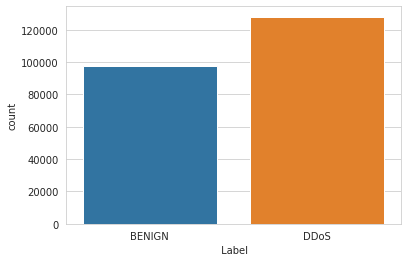

In [8]:
sns.countplot(df[' Label'])

In [9]:
labels = ['BENIGN', 'DDoS']

In [10]:
df[' Label'] = df[' Label'].apply(labels.index)
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [11]:
df.shape

(225745, 79)

In [12]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [13]:
df = clean_dataset(df)
df.shape

(225711, 79)

In [14]:
X = df.drop(' Label', axis=1)
y = df[' Label']

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [17]:
X_train.shape

(157997, 78)

# 1- CNN LSTM MODEL

In [18]:
K.clear_session()
def create_model():
    try:
      Input_ = tf.keras.Input(shape=(78,))

      model = tf.keras.layers.Dense(64, activation=tf.nn.relu)(Input_)
      model = tf.keras.layers.Dropout(0.4)(model)
      model = tf.keras.layers.BatchNormalization()(model)

      model = tf.keras.layers.Dense(64, activation=tf.nn.relu)(model)
      model = tf.keras.layers.Dropout(0.4)(model)
      model = tf.keras.layers.BatchNormalization()(model)

      model = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(model)
      return tf.keras.Model(inputs=Input_, outputs=model)
    except:
      Input_ = tf.keras.Input(shape=(78,))
      model = tf.keras.layers.Dense(64, activation=tf.nn.relu)(Input_)
      model = tf.keras.layers.Dropout(0.4)(model)
      model = tf.keras.layers.BatchNormalization()(model)
      model = tf.keras.layers.Dense(64, activation=tf.nn.relu)(model)
      model = tf.keras.layers.Dropout(0.4)(model)
      model = tf.keras.layers.BatchNormalization()(model)
      moddel = Sequential()
      moddel.add(Conv2D(64, (3, 3), activation='relu',use_bias=True, input_shape=(10,10,3)))
      moddel.add(LSTM(2))
      moddel.add(Flatten())
      
      model = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(model)
      return tf.keras.Model(inputs=Input_, outputs=model)
    model = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(model)
    return tf.keras.Model(inputs=Input_, outputs=model)

In [19]:
model = create_model()

In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [21]:
model.fit(X_train, y_train, epochs=2, batch_size=16, verbose=True, validation_data=(X_test, y_test))

Epoch 1/2
9875/9875 [==============================] - 53s 5ms/step - loss: 0.0447 - accuracy: 0.9861 - val_loss: 0.2096 - val_accuracy: 0.8713
Epoch 2/2
9875/9875 [==============================] - 50s 5ms/step - loss: 0.0161 - accuracy: 0.9958 - val_loss: 0.1677 - val_accuracy: 0.9282


In [22]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)

2117/2117 [==============================] - 3s 1ms/step


In [23]:
y_pred = [1.0 if i > 0.5 else 0.0 for i in y_pred ]

In [24]:
conf = confusion_matrix(list(y_test), y_pred)
conf

array([[29340,     2],
       [ 4860, 33512]])

## Confusion Matrix

Text(42.0, 0.5, 'Actual')

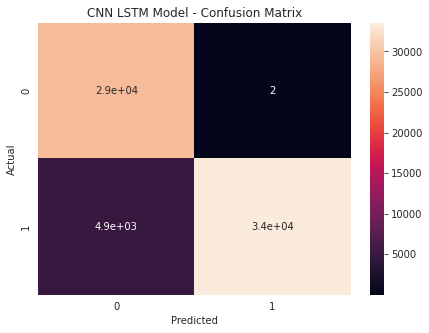

In [25]:
plt.figure(figsize = (7, 5))
sns.heatmap(conf, annot=True)
plt.title("CNN LSTM Model - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [26]:
from sklearn.metrics import accuracy_score
print("Accuracy of CNN-LSTM Model: ", accuracy_score(list(y_test), y_pred))

Accuracy of CNN-LSTM Model:  0.9281980092743007


In [27]:
# y_pred = model.predict(X_test)
# acc = metrics.roc_auc_score(y_test, y_pred)
# print("Accuracy: ", acc)

In [28]:
def predict_on_new_data(data, m):
  print("Data Shape: ", data.shape)
  X = scaler.fit_transform(data)
  res = m.predict(np.array(X))
  return res
  

In [29]:
#testDf = pd.read_csv('drive/MyDrive/datasets/LDDos/lddostest.csv')
#predictions = predict_on_new_data(testDf, model)
#print(predictions)

Data Shape:  (3008, 78)
94/94 [==============================] - 0s 2ms/step
[[8.9652985e-02]
 [1.8223387e-01]
 [1.8514787e-04]
 ...
 [9.9861347e-05]
 [9.2063493e-01]
 [3.9368123e-04]]


In [30]:
# testDf = pd.read_csv('drive/MyDrive/datasets/LDDos/lddos2.csv')
# testDf[' Label'] = testDf[' Label'].apply(labels.index)
# testDf = clean_dataset(testDf)
# testDf = testDf.drop([' Label'], axis = 1)
# print(testDf.shape)
# predictions = predict_on_new_data(testDf, model)

In [31]:
#predictions

array([[8.9652985e-02],
       [1.8223387e-01],
       [1.8514787e-04],
       ...,
       [9.9861347e-05],
       [9.2063493e-01],
       [3.9368123e-04]], dtype=float32)

In [32]:
#model.predict()

TypeError: ignored

# CNN RF Model

In [ ]:
K.clear_session()
def creat_cnn_rf_model():
  try:
    Input_ = tf.keras.Input(shape=(78,))
    model = tf.keras.layers.Dense(28, activation=tf.nn.relu)(Input_)
    model = tf.keras.layers.Dropout(0.4)(model)
    model = tf.keras.layers.BatchNormalization()(model)

    model = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(model)
    return tf.keras.Model(inputs=Input_, outputs=model)
  except:
    model = Sequential()
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(78,78,1)))
    model.add(Conv2D(32, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    model = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(model)
    return tf.keras.Model(inputs=Input_, outputs=model)

In [ ]:
model2 = creat_cnn_rf_model()

In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [ ]:
model2.fit(X_train, y_train, epochs=2, batch_size=16, verbose=True, validation_data=(X_test, y_test))

## Confusion Matrix

In [ ]:
y_pred = model2.predict(X_test)
y_pred = [1.0 if i > 0.5 else 0.0 for i in y_pred ]
conf = confusion_matrix(list(y_test), y_pred)
conf

In [ ]:
plt.figure(figsize = (7, 5))
sns.heatmap(conf, annot=True)
plt.title("CNN RF Model - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
print("Accuracy of CNN-RF Model: ", accuracy_score(list(y_test), y_pred))

In [ ]:
# y_pred = model2.predict(X_test)
# acc = metrics.roc_auc_score(y_test, y_pred)
# print("Accuracy: ", acc)

# 3- LSTM RF Model

In [39]:
K.clear_session()
def creat_lstm_rf_model():
  try:
    Input_ = tf.keras.Input(shape=(78,))
    model = tf.keras.layers.Dense(16, activation=tf.nn.relu)(Input_)
    model = tf.keras.layers.Dropout(0.4)(model)
    model = tf.keras.layers.BatchNormalization()(model)

    model = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(model)
    return tf.keras.Model(inputs=Input_, outputs=model)
  except:
    Input_ = tf.keras.Input(shape=(78,))
    model = tf.keras.layers.Dense(64, activation=tf.nn.relu)(Input_)
    model = tf.keras.layers.Dropout(0.4)(model)
    model = tf.keras.layers.BatchNormalization()(model)
    model = tf.keras.layers.Dense(64, activation=tf.nn.relu)(model)
    model = tf.keras.layers.Dropout(0.4)(model)
    model = tf.keras.layers.BatchNormalization()(model)
    moddel = Sequential()
    moddel.add(Conv2D(64, (3, 3), activation='relu',use_bias=True, input_shape=(10,10,3)))
    moddel.add(LSTM(2))
    moddel.add(Flatten())
    model = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(model)
    return tf.keras.Model(inputs=Input_, outputs=model)

In [34]:
model3 = creat_lstm_rf_model()
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
model3.fit(X_train, y_train, epochs=2, batch_size=16, verbose=True, validation_data=(X_test, y_test))

Epoch 1/2
9875/9875 [==============================] - 37s 4ms/step - loss: 0.0703 - accuracy: 0.9766 - val_loss: 0.0363 - val_accuracy: 0.9977
Epoch 2/2
9875/9875 [==============================] - 42s 4ms/step - loss: 0.0388 - accuracy: 0.9876 - val_loss: 0.1175 - val_accuracy: 0.9985


## Confusion Matrix

In [35]:
y_pred = model3.predict(X_test)
y_pred = [1.0 if i > 0.5 else 0.0 for i in y_pred ]
conf = confusion_matrix(list(y_test), y_pred)
conf

2117/2117 [==============================] - 3s 1ms/step


array([[29274,    68],
       [   36, 38336]])

Text(42.0, 0.5, 'Actual')

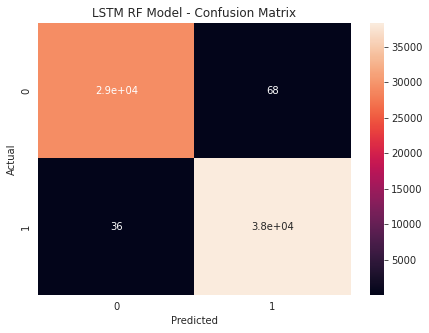

In [36]:
plt.figure(figsize = (7, 5))
sns.heatmap(conf, annot=True)
plt.title("LSTM RF Model - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [37]:
print("Accuracy of LSTM-RF Model: ", accuracy_score(list(y_test), y_pred))

Accuracy of LSTM-RF Model:  0.9984641285406267


In [38]:
# y_pred = model3.predict(X_test)
# acc = metrics.roc_auc_score(y_test, y_pred)
# print("Accuracy: ", acc)

# ML Algorithms

In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

In [41]:
class Model:
    global y
    def __init__(self, data):
        self.data = data
        X = preprocessing.StandardScaler().fit(self.data).transform(self.data)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, random_state=42, test_size=0.45)  
    
    def LogisticRegression(self):
        solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

        start_time = time.time()
        results_lr = []
        accuracy_list = []
        for solver in solvers:
            LR = LogisticRegression(C=0.03, solver=solver).fit(self.X_train, self.y_train)
            predicted_lr = LR.predict(self.X_test)
            accuracy_lr = accuracy_score(self.y_test, predicted_lr)
            results_lr.append({'solver' : solver, 'accuracy': str(round(accuracy_lr * 100, 2)) + "%", 
                                  'Coefficients': {'W' : LR.coef_, 'b': LR.intercept_}})
            accuracy_list.append(accuracy_lr)
       
        solver_name = solvers[accuracy_list.index(max(accuracy_list))]
        LR = LogisticRegression(C=0.03, solver=solver_name).fit(self.X_train,self.y_train)
        predicted_lr = LR.predict(self.X_test)
        accuracy_lr = accuracy_score(self.y_test, predicted_lr)
        print("Accuracy: %.2f%%" % (accuracy_lr * 100.0), '\n')
        print("########################################################################")
        print('Best solver is : ', solver_name)
        print("########################################################################")
        print(classification_report(predicted_lr, self.y_test), '\n')
        print("########################################################################")
        print("--- %s seconds --- time for LogisticRegression" % (time.time() - start_time))
        
        
    def SupportVectorMachine(self):
        start_time = time.time()
        accuracy_list = []
        result_svm = []
        kernels = ['linear', 'poly','rbf', 'sigmoid']
        for kernel in kernels:
            SVM = svm.SVC(kernel=kernel).fit(self.X_train, self.y_train)
            predicted_svm = SVM.predict(self.X_test)
            accuracy_svm = accuracy_score(self.y_test, predicted_svm)
            result_svm.append({"kernel" : kernel, "accuracy": f"{round(accuracy_svm*100,2)}%"})
            print("Accuracy: %.2f%%" % round((accuracy_svm * 100.0),2))
            print('######################################################################')
            accuracy_list.append(accuracy_svm)
        
        kernel_name = kernels[accuracy_list.index(max(accuracy_list))]
        SVM = svm.SVC(kernel=kernel_name).fit(self.X_train, self.y_train)
        predicted_svm = SVM.predict(self.X_test)
        accuracy_svm = accuracy_score(self.y_test, predicted_svm)
        print(f"Accuracy of SVM model {round(accuracy_svm,2)*100}%", '\n')
        print("########################################################################")
        print('best kernel is : ', kernel_name)
        print("########################################################################")
        print(classification_report(predicted_svm, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))
        
    def KNearetsNeighbor(self):
        start_time = time.time()
        Ks = 12
        accuracy_knn = np.zeros((Ks-1))
        std_acc = np.zeros((Ks-1))
        for n in range(1,Ks):
            # Train KNN Model and then predict 
            neigh = KNeighborsClassifier(n_neighbors = n).fit(self.X_train,self.y_train)
            yhat=neigh.predict(self.X_test)
            accuracy_knn[n-1] = metrics.accuracy_score(self.y_test, yhat)


            std_acc[n-1]=np.std(yhat==self.y_test)/np.sqrt(yhat.shape[0])

        plt.figure(figsize=(10,6))
        plt.plot(range(1,Ks),accuracy_knn,'g')
        plt.fill_between(range(1,Ks),accuracy_knn - 1 * std_acc,accuracy_knn + 1 * std_acc, alpha=0.10)
        plt.fill_between(range(1,Ks),accuracy_knn - 3 * std_acc,accuracy_knn + 3 * std_acc, alpha=0.10,color="green")
        plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
        plt.ylabel('Accuracy ')
        plt.xlabel('Number of Neighbors (K)')
        plt.tight_layout()
        plt.show()
        
        
        knnc = KNeighborsClassifier()
        knnc_search = GridSearchCV(knnc, param_grid={'n_neighbors': [3, 5, 10],
                                             'weights': ['uniform', 'distance'],
                                             'metric': ['euclidean', 'manhattan']},
                           n_jobs=-1, cv=3, scoring='accuracy', verbose=2)
        
        knnc_search.fit(self.X_train, self.y_train)
        n_neighbors = knnc_search.best_params_['n_neighbors']
        weights = knnc_search.best_params_['weights']
        metric = knnc_search.best_params_['metric']
        KNN = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric, weights=weights).fit(self.X_train,self.y_train)
        
        predicted_knn = KNN.predict(self.X_test)
        accuracy_knn = metrics.accuracy_score(self.y_test, predicted_knn)
        print(f"Accuracy of KNN model {round(accuracy_knn,2)*100}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_knn, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))
        
    def DecisionTree(self):
        start_time = time.time()
        tree = DecisionTreeClassifier()
        dt_search = GridSearchCV(tree, param_grid={'criterion' : ['gini', 'entropy'],
                                           'max_depth' : [2,3,4,5,6,7,8, 9, 10],
                                           'max_leaf_nodes' : [2,3,4,5,6,7,8,9,10, 11]},
                           n_jobs=-1, cv=5, scoring='accuracy', verbose=2)
        
        dt_search.fit(self.X_train, self.y_train)
        
        criterion = dt_search.best_params_['criterion']
        max_depth = dt_search.best_params_['max_depth']
        max_leaf_nodes = dt_search.best_params_['max_leaf_nodes']
        
        dtree = DecisionTreeClassifier(criterion=criterion, 
                                       max_depth=max_depth, 
                                       max_leaf_nodes=max_leaf_nodes).fit(self.X_train, self.y_train)
        predicted_dt = dtree.predict(self.X_test)
        accuracy_dt = metrics.accuracy_score(self.y_test, predicted_dt)
        print(f"criterion: {criterion}, max depth: {max_depth}, max_leaf: {max_leaf_nodes}")
        print(f"The Accuracy is : {round(accuracy_dt * 100,2)}%")
        print("########################################################################")
        print(classification_report(predicted_dt, self.y_test))
        print("########################################################################")
        
        print("--- %s seconds ---" % (time.time() - start_time))
    
    def RandomForest(self):
        start_time = time.time()
        RF = RandomForestClassifier(criterion='gini', 
                                     n_estimators=500,
                                     min_samples_split=10,
                                     #min_samples_leaf=1,
                                     max_features='auto',
                                     oob_score=True,
                                     random_state=1,
                                     n_jobs=-1).fit(self.X_train, self.y_train)
        
        predicted_rf = RF.predict(self.X_test)
        svm_accuracy = accuracy_score(self.y_test, predicted_rf)
        print(f"Accuracy of RF is : {round(svm_accuracy*100,2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_rf, self.y_test))
        print("########################################################################")
        
        print("--- %s seconds ---" % (time.time() - start_time))

In [42]:
M = Model(X)

# Training Logistic Regression

In [43]:
M.LogisticRegression()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 98.91% 

########################################################################
Best solver is :  newton-cg
########################################################################
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     43020
         1.0       1.00      0.98      0.99     58550

    accuracy                           0.99    101570
   macro avg       0.99      0.99      0.99    101570
weighted avg       0.99      0.99      0.99    101570
 

########################################################################
--- 44.00452995300293 seconds --- time for LogisticRegression


# Training SVM

In [44]:
M.SupportVectorMachine()

Accuracy: 99.90%
######################################################################
Accuracy: 98.82%
######################################################################
Accuracy: 99.86%
######################################################################
Accuracy: 96.76%
######################################################################


KeyboardInterrupt: ignored

# Training Decision Tree

In [45]:
M.DecisionTree()

Fitting 5 folds for each of 180 candidates, totalling 900 fits


KeyboardInterrupt: ignored

# Training Random Forest Classifier


In [46]:
M.RandomForest()

Accuracy of RF is : 99.99% 

########################################################################
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     44042
         1.0       1.00      1.00      1.00     57528

    accuracy                           1.00    101570
   macro avg       1.00      1.00      1.00    101570
weighted avg       1.00      1.00      1.00    101570

########################################################################
--- 76.27061581611633 seconds ---


# Training K-Nearest Neighbors

In [47]:
M.KNearetsNeighbor()

KeyboardInterrupt: ignored